In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_agr=pd.read_excel('E:/train_agriculture.xlsx')
df_agr=pd.DataFrame(df_agr)
df_agr

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


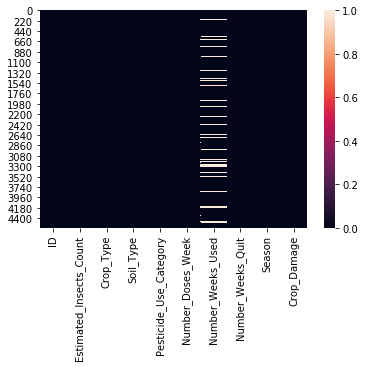

In [3]:
#checking for any missing data
sns.heatmap(df_agr.isnull())

In [4]:
df_agr.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [5]:
df_agr['Number_Weeks_Used'].mean()

28.89102718306471

In [6]:
df_agr['Number_Weeks_Used'].replace(np.NaN,df_agr['Number_Weeks_Used'].mean(),inplace=True)

In [7]:
df_agr.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [8]:
#checking data types
df_agr.dtypes
#We can see the attributes are in numerical and categorical form

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [9]:
#checking the basic info about the attributes and their counts
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [10]:
#checking the maximum and minimum values of each attribute and their percentiles
df_agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


# Univariate Analysis

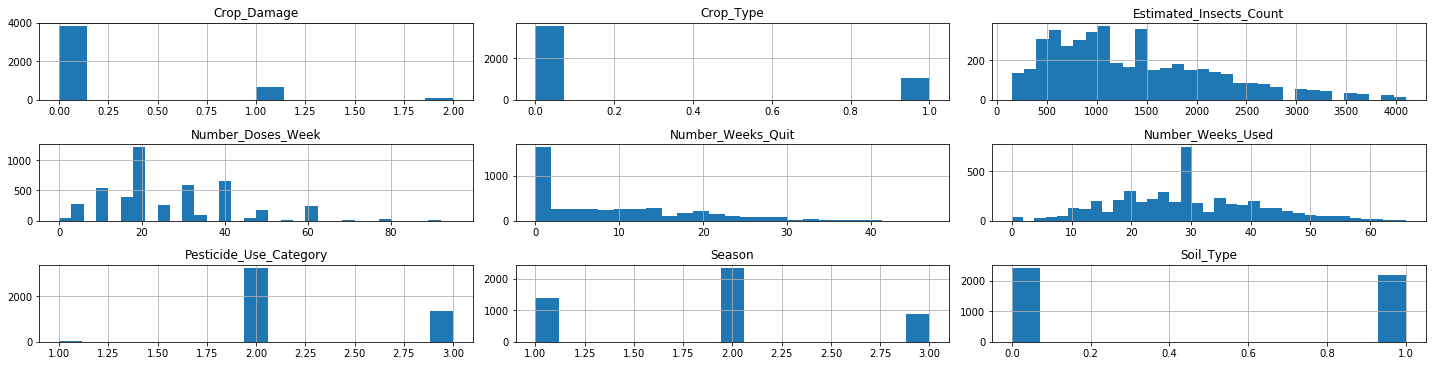

In [11]:
df_agr.hist(figsize = (20,10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

In [12]:
df_agr.drop(['ID'],axis=1,inplace=True)

In [13]:
df_agr.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

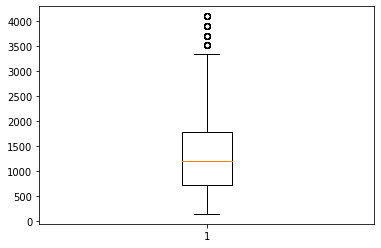

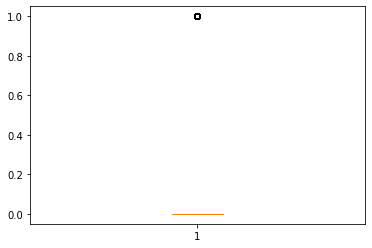

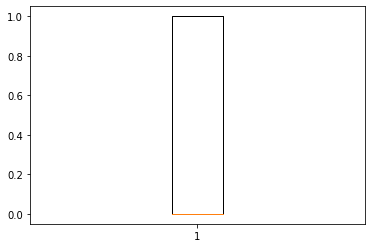

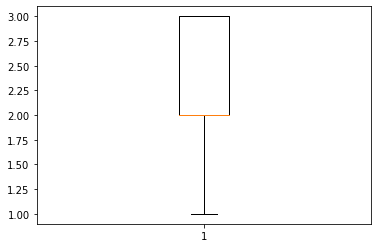

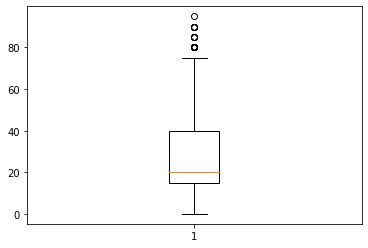

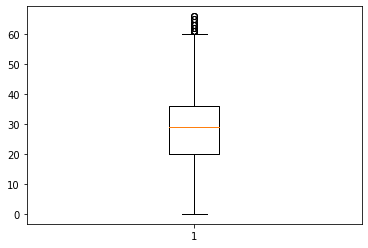

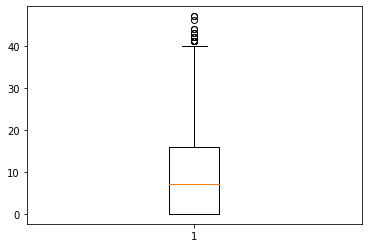

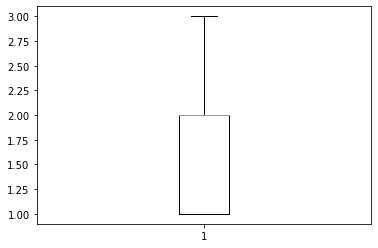

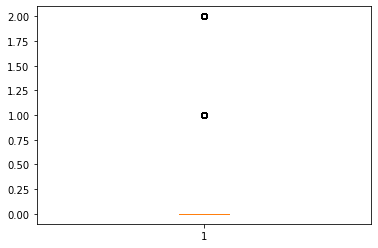

In [14]:
for i in df_agr.columns :
    plt.boxplot(df_agr[i])
    plt.show()

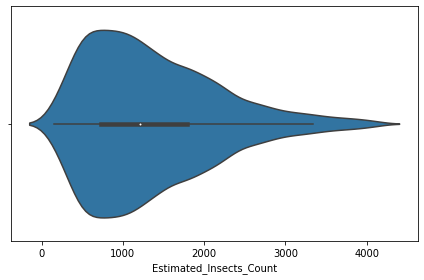

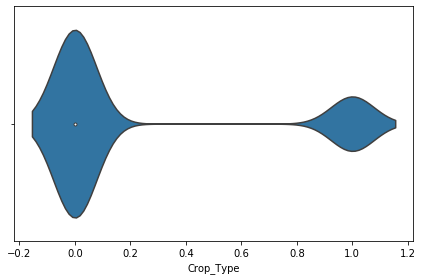

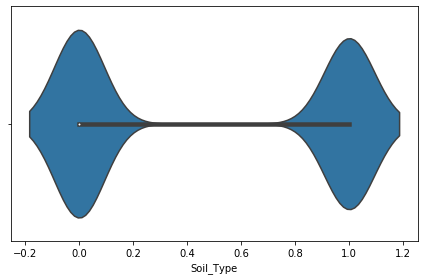

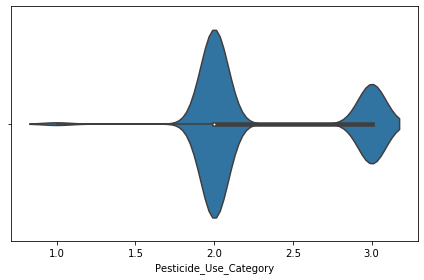

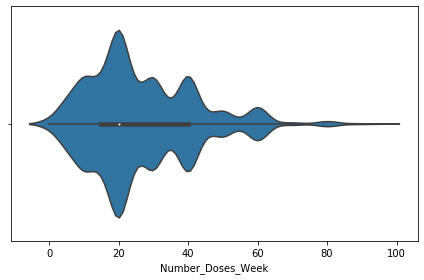

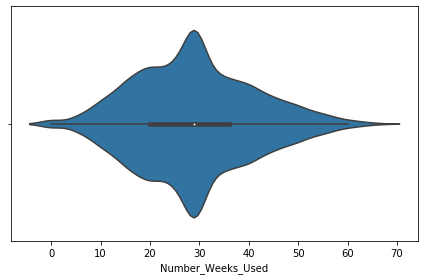

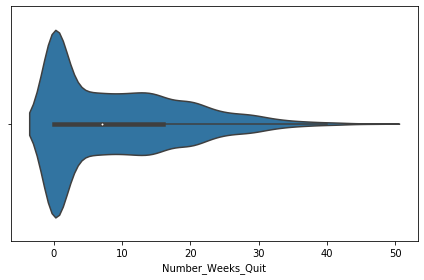

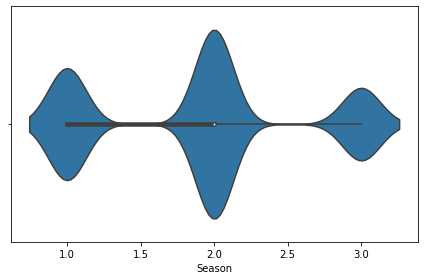

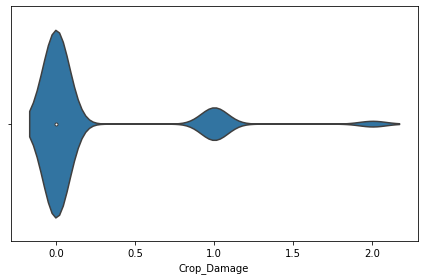

In [15]:
for i in df_agr.columns:
    sns.violinplot(x=i,data=df_agr)
    plt.tight_layout()
    plt.show()

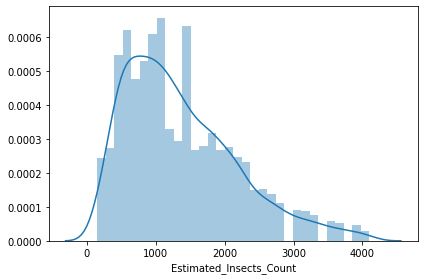

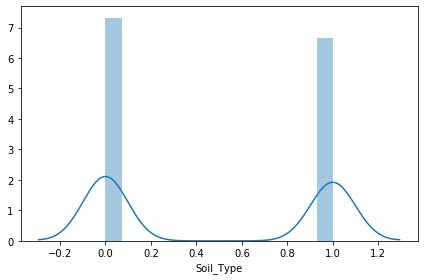

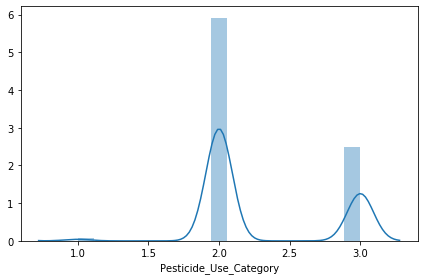

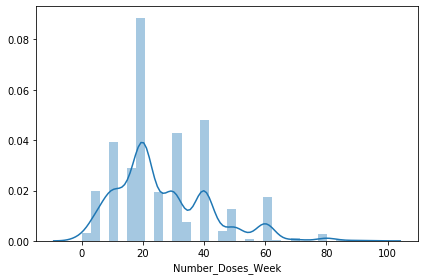

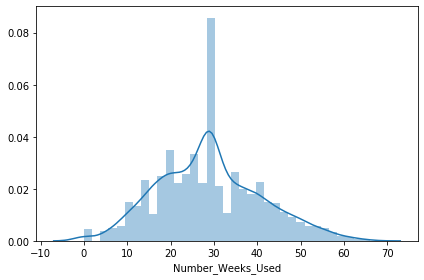

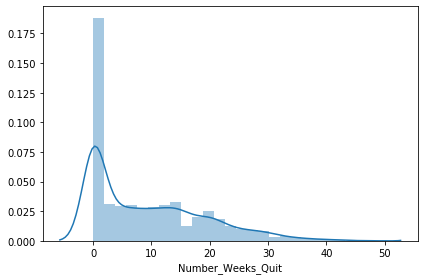

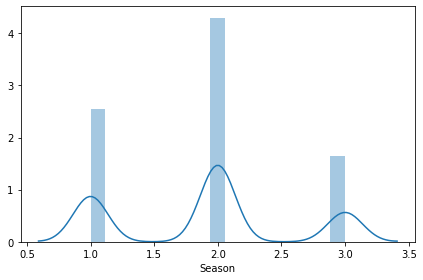

In [16]:
#Checking for the distribution of the data
for i in ['Estimated_Insects_Count', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season']:
    sns.distplot(df_agr[i],bins='auto')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

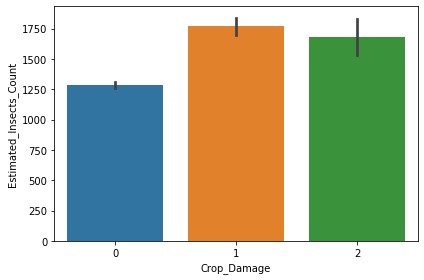

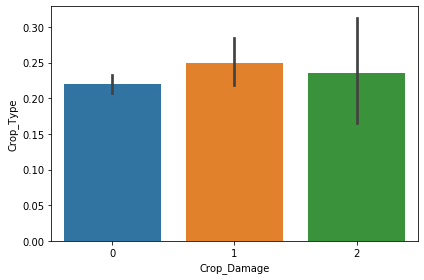

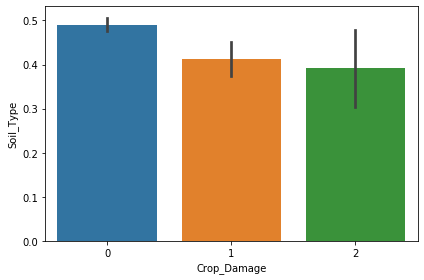

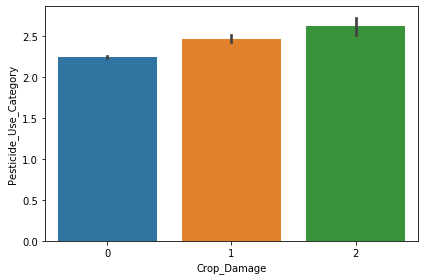

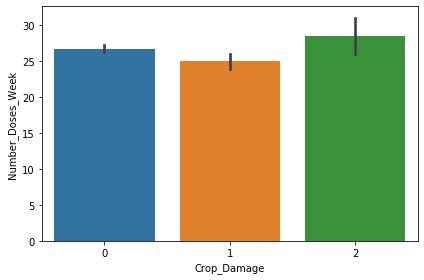

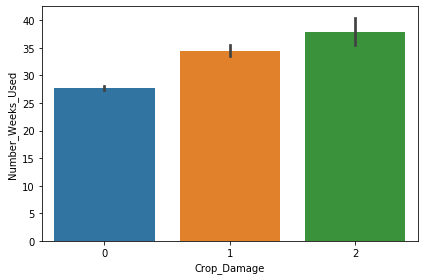

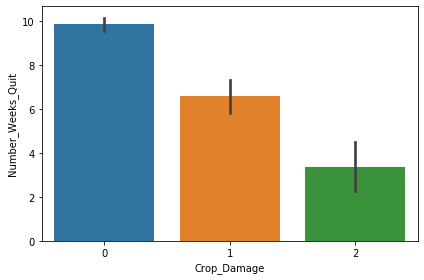

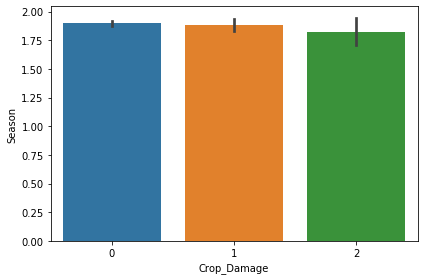

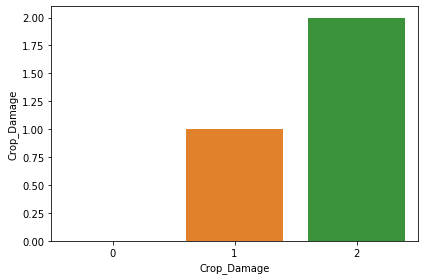

In [17]:
for i in df_agr.columns:
    sns.barplot(df_agr['Crop_Damage'],df_agr[i])
    plt.tight_layout()
    plt.show()

In [18]:
#Checking the correlation between the attributes
df_agr.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


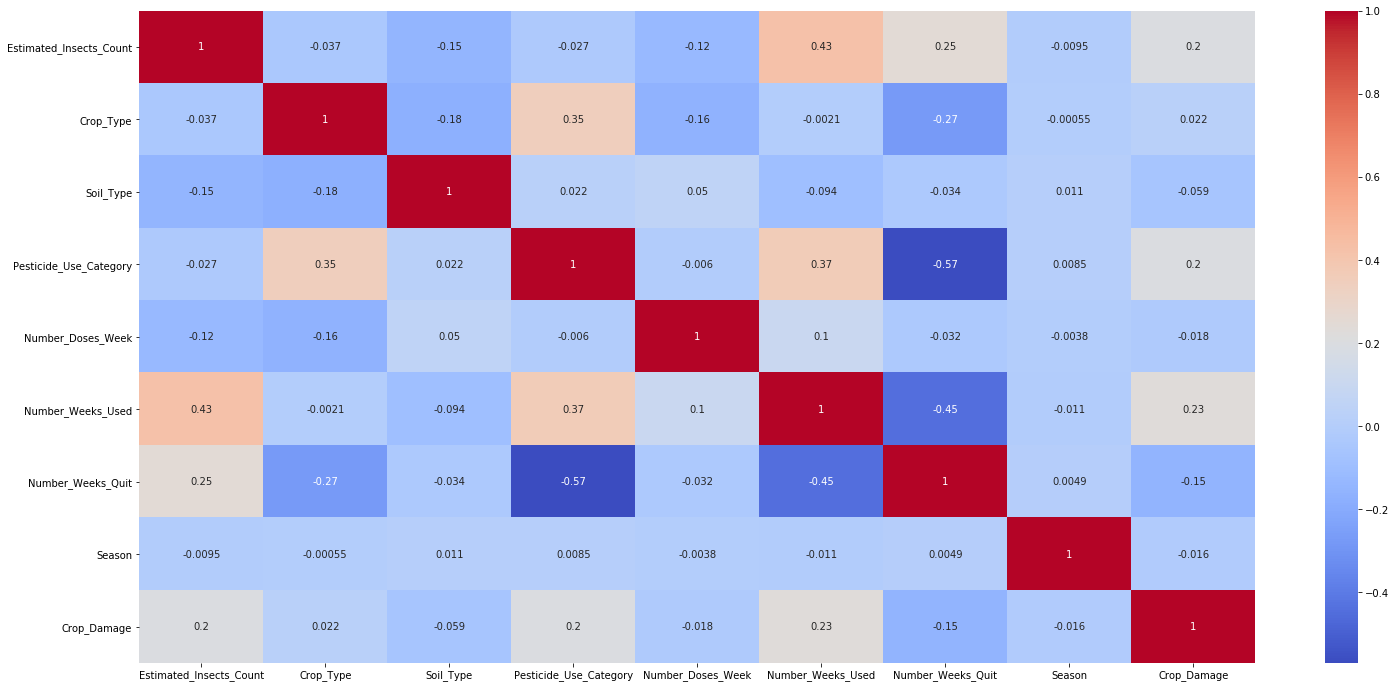

In [19]:
plt.figure(figsize=(25,12))
sns.heatmap(df_agr.corr(),cmap='coolwarm',annot=True)
plt.show()

In [20]:
for i in df_agr.columns:
    print(df_agr[i].value_counts())

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64
0    3565
1    1034
Name: Crop_Type, dtype: int64
0    2407
1    2192
Name: Soil_Type, dtype: int64
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64
20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64
28.891027    442
20.000000    209
30.000000    194
25.000000    165
40.000000    133
            ... 
62.000000      5
59.000000      5
65.000000      3
66.000000      3
64.000000      1
Name: Number_Weeks_Used, Length: 64, dtype: int64
0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7

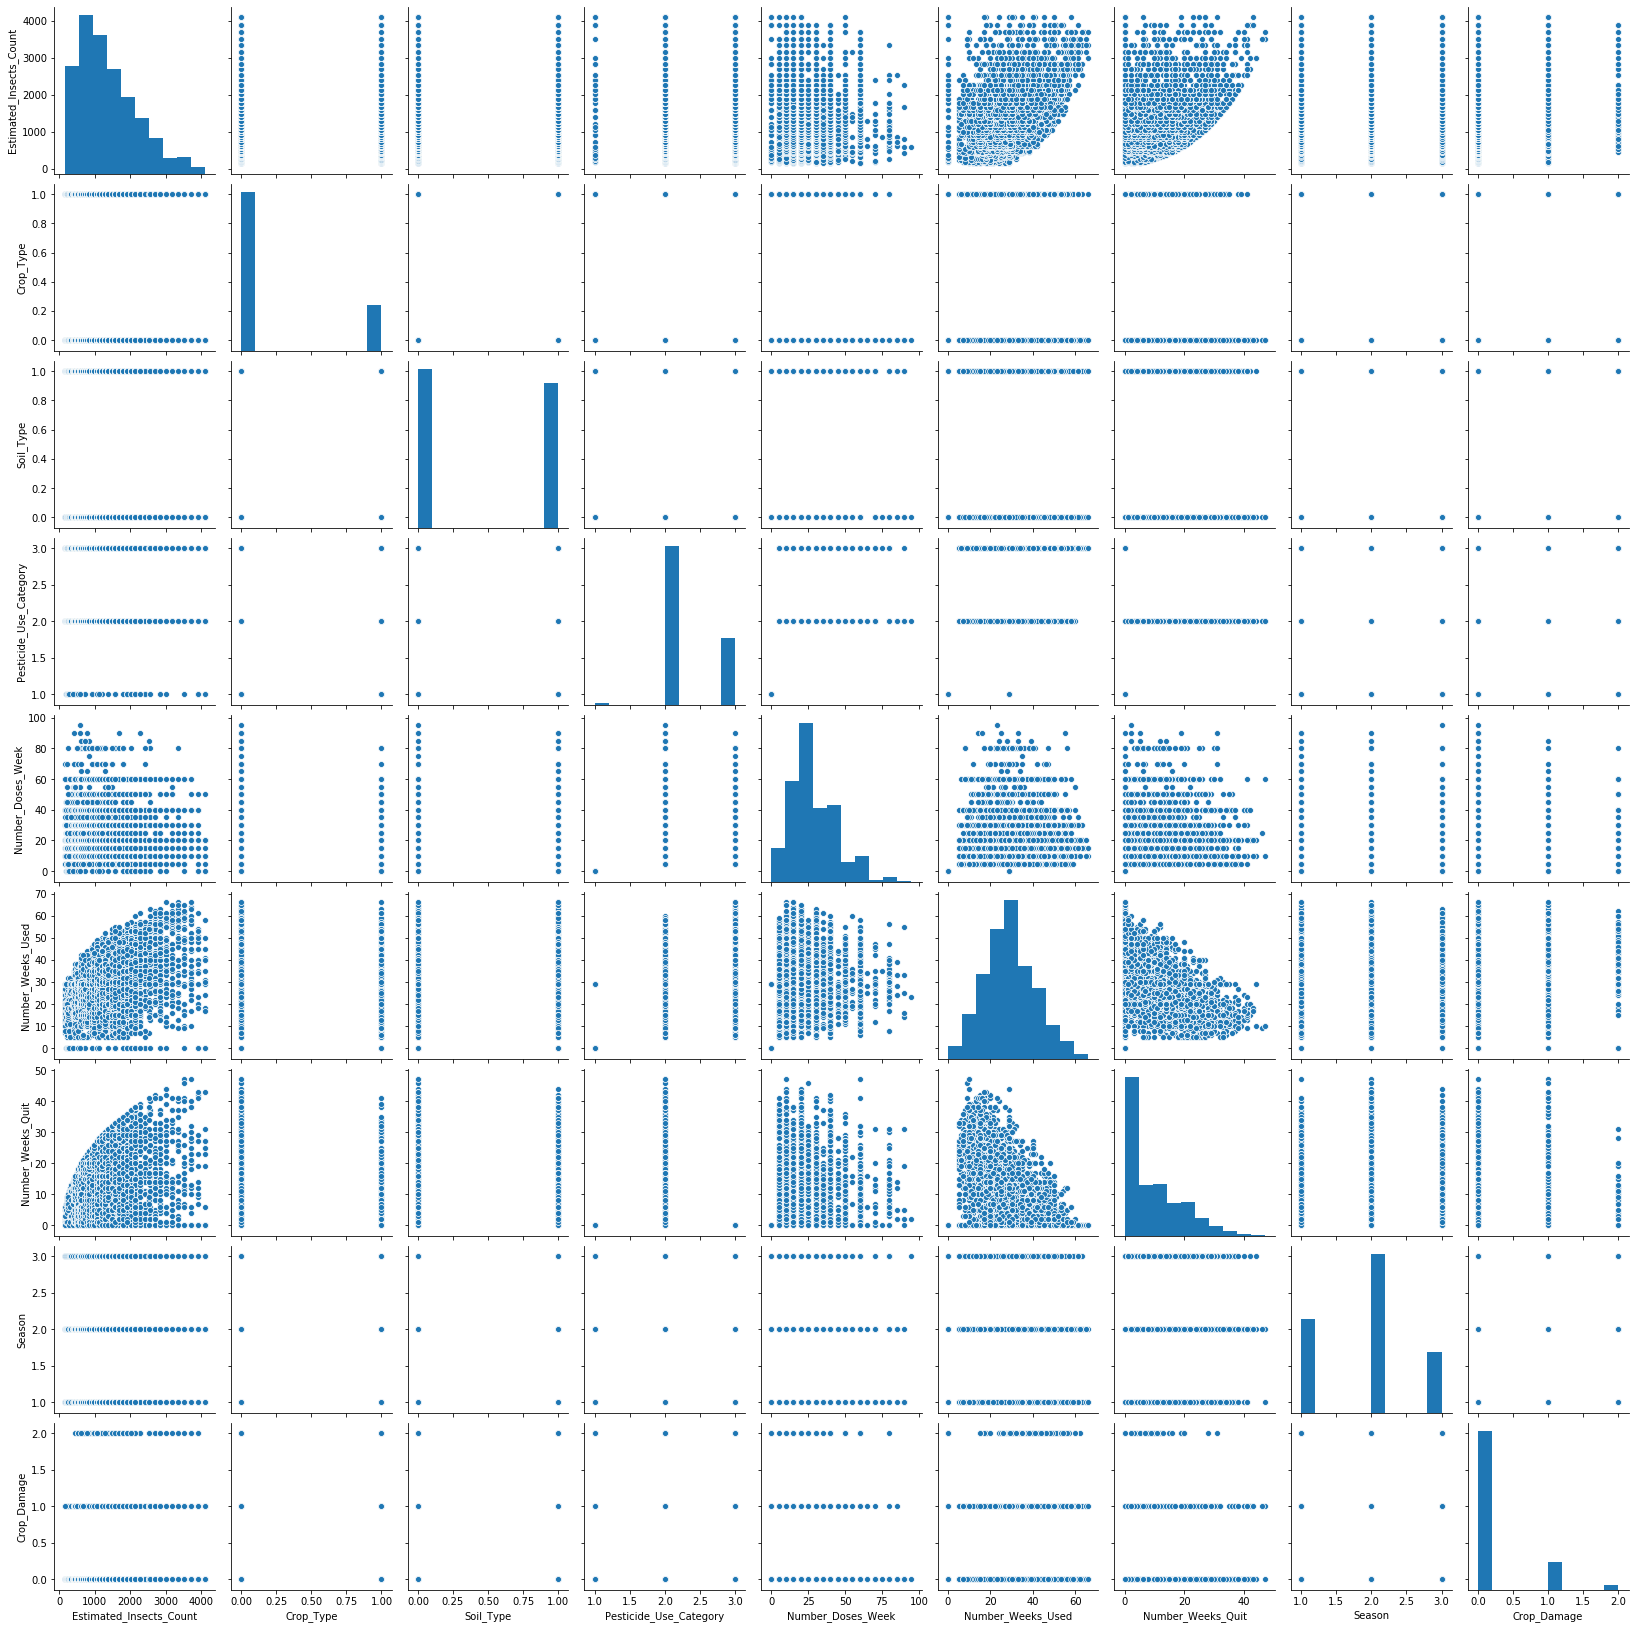

In [21]:
sns.pairplot(df_agr)

In [22]:
df_agr.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [23]:
#removing skewness using log transform
for col in ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit']:
        df_agr[col]=np.log1p(df_agr[col])

In [24]:
df_agr.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.199671
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [25]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_agr))
print(zscore)
print(np.where(zscore>3))
df_agr_new=df_agr[(zscore<3).all(axis=1)]

[[2.6972821  1.85681868 0.95429408 ... 1.27439172 1.28702725 0.42765624]
 [2.53778832 1.85681868 0.95429408 ... 1.27439172 0.15207762 1.77233374]
 [2.22617137 1.85681868 0.95429408 ... 1.27439172 0.15207762 1.77233374]
 ...
 [1.06434674 0.53855555 1.04789501 ... 1.2880743  0.15207762 0.42765624]
 [1.06434674 0.53855555 1.04789501 ... 1.20092452 0.15207762 0.42765624]
 [1.06434674 0.53855555 1.04789501 ... 0.94830482 0.15207762 0.42765624]]
(array([   0,    1,    2,    3,    4,    5,    6,    7,    7,    8,    9,
          9,   10,   11,   12,   13,   14,   14,   15,   16,   17,   18,
         19,   20,   21,   22,   23,   24,   25,   26,  103,  112,  149,
        165,  166,  167,  179,  186,  197,  207,  222,  223,  242,  248,
        264,  265,  290,  296,  305,  316,  351,  355,  361,  374,  375,
        377,  385,  386,  387,  388,  389,  390,  453,  458,  466,  480,
        510,  517,  522,  557,  595,  612,  634,  693,  819,  944,  980,
       1067, 1178, 1327, 1339, 1340, 1350, 1

In [26]:
print('Before removing outliers:',df_agr.shape)
print('After removing outliers:',df_agr_new.shape)

Before removing outliers: (4599, 9)
After removing outliers: (4414, 9)


In [27]:
df_agr_new.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [28]:
df_agr_final=pd.get_dummies(df_agr_new, columns = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season'])

In [31]:
df_agr_final

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
27,5.129899,3.044522,14.000000,0.000000,0,1,0,0,1,0,1,0,1,0
28,5.129899,3.044522,15.000000,0.000000,1,1,0,0,1,0,1,0,1,0
29,5.241747,3.258097,19.000000,0.000000,0,1,0,1,0,0,1,1,0,0
30,5.241747,3.713572,24.000000,0.000000,0,1,0,0,1,0,1,0,0,1
31,5.347108,3.044522,8.000000,0.000000,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,7.668094,3.044522,28.891027,0.693147,1,1,0,0,1,1,0,1,0,0
4595,7.668561,3.433987,47.000000,1.098612,1,1,0,0,1,1,0,1,0,0
4596,7.726654,2.397895,7.000000,3.332205,0,1,0,0,1,1,0,0,1,0
4597,7.726654,2.397895,20.000000,3.218876,0,1,0,0,1,1,0,0,1,0


In [32]:
#separating into input and output variables
df_x=df_agr_final.drop(columns=['Crop_Damage'])
y=pd.DataFrame(df_agr_final['Crop_Damage'])

In [33]:
df_x.shape

(4414, 13)

In [34]:
y.shape

(4414, 1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [40]:
x

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,-2.943659,-0.190332,-1.291133,-1.325048,0.532109,-0.759519,-1.044487,1.044487,-1.593642,0.953063,-1.063003,0.992327,-0.681309
1,-2.943659,-0.190332,-1.204429,-1.325048,0.532109,-0.759519,-1.044487,1.044487,-1.593642,0.953063,-1.063003,0.992327,-0.681309
2,-2.769937,0.168281,-0.857617,-1.325048,0.532109,-0.759519,0.957408,-0.957408,-1.593642,0.953063,0.927306,-1.007733,-0.681309
3,-2.769937,0.933073,-0.424101,-1.325048,0.532109,-0.759519,-1.044487,1.044487,-1.593642,0.953063,-1.063003,-1.007733,1.106615
4,-2.606292,-0.190332,-1.811352,-1.325048,0.532109,-0.759519,-1.044487,1.044487,-1.593642,0.953063,-1.063003,-1.007733,1.106615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,0.998650,-0.190332,-0.000033,-0.787180,0.532109,-0.759519,-1.044487,1.044487,0.627493,-0.987501,0.927306,-1.007733,-0.681309
4410,0.999376,0.463620,1.570072,-0.472547,0.532109,-0.759519,-1.044487,1.044487,0.627493,-0.987501,0.927306,-1.007733,-0.681309
4411,1.089605,-1.276088,-1.898055,1.260677,0.532109,-0.759519,-1.044487,1.044487,0.627493,-0.987501,-1.063003,0.992327,-0.681309
4412,1.089605,-1.276088,-0.770913,1.172736,0.532109,-0.759519,-1.044487,1.044487,0.627493,-0.987501,-1.063003,0.992327,-0.681309


In [41]:
y

,Crop_Damage
27,0
28,1
29,0
30,0
31,0
...,...
4594,1
4595,1
4596,0
4597,0


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                                                                                                                   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [44]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.8663646659116648
confusion matrix corresponding to random state: 42 is: [[753  15]
 [103  12]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       768
           1       0.44      0.10      0.17       115

    accuracy                           0.87       883
   macro avg       0.66      0.54      0.55       883
weighted avg       0.82      0.87      0.83       883


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 43 is: 0.8425821064552661
confusion matrix corresponding to random state: 43 is: [[727  24]
 [115  17]]
classification report corresponding to random state: 43 is:               precision    recall  f1-score   support

           0       0.86      0.97      0.91       751
           1       0.41      0.13      0.20       132

    accuracy                           0.84       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 45 is: 0.8289920724801813
confusion matrix corresponding to random state: 45 is: [[710  38]
 [113  22]]
classification report corresponding to random state: 45 is:               precision    recall  f1-score   support

           0       0.86      0.95      0.90       748
           1       0.37      0.16      0.23       135

    accuracy                           0.83       883
   macro avg       0.61      0.56      0.56       883
weighted avg       0.79      0.83      0.80       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 45 is: 0.8086070215175538
confusion matrix corresponding to random state: 45 is: [[652  96]
 [ 73  62]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 47 is: 0.8686296715741789
confusion matrix corresponding to random state: 47 is: [[767   0]
 [116   0]]
classification report corresponding to random state: 47 is:               precision    recall  f1-score   support

           0       0.87      1.00      0.93       767
           1       0.00      0.00      0.00       116

    accuracy                           0.87       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.75      0.87      0.81       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 48 is: 0.8323895809739524
confusion matrix corresponding to random state: 48 is: [[708  33]
 [115  27]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.86      0.96      0.91       741
           1       0.45      0.19      0.27       142

    accuracy                           0.83       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 50 is: 0.82559456398641
confusion matrix corresponding to random state: 50 is: [[708  43]
 [111  21]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0       0.86      0.94      0.90       751
           1       0.33      0.16      0.21       132

    accuracy                           0.83       883
   macro avg       0.60      0.55      0.56       883
weighted avg       0.78      0.83      0.80       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 50 is: 0.7814269535673839
confusion matrix corresponding to random state: 50 is: [[625 126]
 [ 67  65]]
classification report corresponding to

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 52 is: 0.8437146092865232
confusion matrix corresponding to random state: 52 is: [[745   0]
 [138   0]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.84      1.00      0.92       745
           1       0.00      0.00      0.00       138

    accuracy                           0.84       883
   macro avg       0.42      0.50      0.46       883
weighted avg       0.71      0.84      0.77       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 53 is: 0.8312570781426953
confusion matrix corresponding to random state: 53 is: [[719  38]
 [111  15]]
classification report corresponding to random state: 53 is:               precision    recall  f1-score   support

           0       0.87      0.95      0.91       757
           1       0.28      0.12      0.17       126

    accuracy                           0.83       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 55 is: 0.853907134767837
confusion matrix corresponding to random state: 55 is: [[731  36]
 [ 93  23]]
classification report corresponding to random state: 55 is:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       767
           1       0.39      0.20      0.26       116

    accuracy                           0.85       883
   macro avg       0.64      0.58      0.59       883
weighted avg       0.82      0.85      0.83       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 55 is: 0.8142695356738392
confusion matrix corresponding to random state: 55 is: [[665 102]
 [ 62  54]]
classification report corresponding t

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 57 is: 0.8607021517553793
confusion matrix corresponding to random state: 57 is: [[760   0]
 [123   0]]
classification report corresponding to random state: 57 is:               precision    recall  f1-score   support

           0       0.86      1.00      0.93       760
           1       0.00      0.00      0.00       123

    accuracy                           0.86       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.74      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 58 is: 0.8482446206115515
confusion matrix corresponding to random state: 58 is: [[732  39]
 [ 95  17]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       771
           1       0.30      0.15      0.20       112

    accuracy                           0.85       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 60 is: 0.8301245753114382
confusion matrix corresponding to random state: 60 is: [[714  46]
 [104  19]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.87      0.94      0.90       760
           1       0.29      0.15      0.20       123

    accuracy                           0.83       883
   macro avg       0.58      0.55      0.55       883
weighted avg       0.79      0.83      0.81       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 60 is: 0.7780294450736127
confusion matrix corresponding to random state: 60 is: [[632 128]
 [ 68  55]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 62 is: 0.8573046432616082
confusion matrix corresponding to random state: 62 is: [[755   4]
 [122   2]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       759
           1       0.33      0.02      0.03       124

    accuracy                           0.86       883
   macro avg       0.60      0.51      0.48       883
weighted avg       0.79      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.8471121177802945
confusion matrix corresponding to random state: 63 is: [[734  36]
 [ 99  14]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0       0.88      0.95      0.92       770
           1       0.28      0.12      0.17       113

    accuracy                           0.85       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 65 is: 0.8323895809739524
confusion matrix corresponding to random state: 65 is: [[722  41]
 [107  13]]
classification report corresponding to random state: 65 is:               precision    recall  f1-score   support

           0       0.87      0.95      0.91       763
           1       0.24      0.11      0.15       120

    accuracy                           0.83       883
   macro avg       0.56      0.53      0.53       883
weighted avg       0.79      0.83      0.80       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 65 is: 0.7916194790486977
confusion matrix corresponding to random state: 65 is: [[644 119]
 [ 65  55]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 67 is: 0.8618346545866364
confusion matrix corresponding to random state: 67 is: [[761   0]
 [122   0]]
classification report corresponding to random state: 67 is:               precision    recall  f1-score   support

           0       0.86      1.00      0.93       761
           1       0.00      0.00      0.00       122

    accuracy                           0.86       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.74      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 68 is: 0.8346545866364666
confusion matrix corresponding to random state: 68 is: [[717  34]
 [112  20]]
classification report corresponding to random state: 68 is:               precision    recall  f1-score   support

           0       0.86      0.95      0.91       751
           1       0.37      0.15      0.22       132

    accuracy                           0.83       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 70 is: 0.8437146092865232
confusion matrix corresponding to random state: 70 is: [[728  42]
 [ 96  17]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       770
           1       0.29      0.15      0.20       113

    accuracy                           0.84       883
   macro avg       0.59      0.55      0.56       883
weighted avg       0.81      0.84      0.82       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 70 is: 0.7882219705549264
confusion matrix corresponding to random state: 70 is: [[642 128]
 [ 59  54]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 72 is: 0.8640996602491506
confusion matrix corresponding to random state: 72 is: [[763   0]
 [120   0]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.86      1.00      0.93       763
           1       0.00      0.00      0.00       120

    accuracy                           0.86       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.75      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 73 is: 0.8289920724801813
confusion matrix corresponding to random state: 73 is: [[710  35]
 [116  22]]
classification report corresponding to random state: 73 is:               precision    recall  f1-score   support

           0       0.86      0.95      0.90       745
           1       0.39      0.16      0.23       138

    accuracy                           0.83       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 75 is: 0.8323895809739524
confusion matrix corresponding to random state: 75 is: [[715  45]
 [103  20]]
classification report corresponding to random state: 75 is:               precision    recall  f1-score   support

           0       0.87      0.94      0.91       760
           1       0.31      0.16      0.21       123

    accuracy                           0.83       883
   macro avg       0.59      0.55      0.56       883
weighted avg       0.80      0.83      0.81       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 75 is: 0.7848244620611552
confusion matrix corresponding to random state: 75 is: [[634 126]
 [ 64  59]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 77 is: 0.8618346545866364
confusion matrix corresponding to random state: 77 is: [[761   0]
 [122   0]]
classification report corresponding to random state: 77 is:               precision    recall  f1-score   support

           0       0.86      1.00      0.93       761
           1       0.00      0.00      0.00       122

    accuracy                           0.86       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.74      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 78 is: 0.8493771234428086
confusion matrix corresponding to random state: 78 is: [[735  41]
 [ 92  15]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       776
           1       0.27      0.14      0.18       107

    accuracy                           0.85       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 80 is: 0.8437146092865232
confusion matrix corresponding to random state: 80 is: [[722  25]
 [113  23]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.86      0.97      0.91       747
           1       0.48      0.17      0.25       136

    accuracy                           0.84       883
   macro avg       0.67      0.57      0.58       883
weighted avg       0.81      0.84      0.81       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 80 is: 0.7859569648924122
confusion matrix corresponding to random state: 80 is: [[636 111]
 [ 78  58]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 82 is: 0.8629671574178935
confusion matrix corresponding to random state: 82 is: [[762   0]
 [121   0]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.86      1.00      0.93       762
           1       0.00      0.00      0.00       121

    accuracy                           0.86       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.74      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 83 is: 0.8471121177802945
confusion matrix corresponding to random state: 83 is: [[734  26]
 [109  14]]
classification report corresponding to random state: 83 is:               precision    recall  f1-score   support

           0       0.87      0.97      0.92       760
           1       0.35      0.11      0.17       123

    accuracy                           0.85       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 85 is: 0.8516421291053228
confusion matrix corresponding to random state: 85 is: [[727  43]
 [ 88  25]]
classification report corresponding to random state: 85 is:               precision    recall  f1-score   support

           0       0.89      0.94      0.92       770
           1       0.37      0.22      0.28       113

    accuracy                           0.85       883
   macro avg       0.63      0.58      0.60       883
weighted avg       0.82      0.85      0.84       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 85 is: 0.7870894677236693
confusion matrix corresponding to random state: 85 is: [[641 129]
 [ 59  54]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 87 is: 0.855039637599094
confusion matrix corresponding to random state: 87 is: [[751   9]
 [119   4]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       760
           1       0.31      0.03      0.06       123

    accuracy                           0.86       883
   macro avg       0.59      0.51      0.49       883
weighted avg       0.79      0.86      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                   

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 88 is: 0.8482446206115515
confusion matrix corresponding to random state: 88 is: [[734  29]
 [105  15]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.87      0.96      0.92       763
           1       0.34      0.12      0.18       120

    accuracy                           0.85       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 90 is: 0.8414496036240091
confusion matrix corresponding to random state: 90 is: [[728  41]
 [ 99  15]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       769
           1       0.27      0.13      0.18       114

    accuracy                           0.84       883
   macro avg       0.57      0.54      0.54       883
weighted avg       0.80      0.84      0.82       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 90 is: 0.8040770101925255
confusion matrix corresponding to random state: 90 is: [[654 115]
 [ 58  56]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 92 is: 0.8527746319365799
confusion matrix corresponding to random state: 92 is: [[753   2]
 [128   0]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.85      1.00      0.92       755
           1       0.00      0.00      0.00       128

    accuracy                           0.85       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.73      0.85      0.79       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 93 is: 0.8380520951302378
confusion matrix corresponding to random state: 93 is: [[720  31]
 [112  20]]
classification report corresponding to random state: 93 is:               precision    recall  f1-score   support

           0       0.87      0.96      0.91       751
           1       0.39      0.15      0.22       132

    accuracy                           0.84       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 95 is: 0.8448471121177803
confusion matrix corresponding to random state: 95 is: [[722  38]
 [ 99  24]]
classification report corresponding to random state: 95 is:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       760
           1       0.39      0.20      0.26       123

    accuracy                           0.84       883
   macro avg       0.63      0.57      0.59       883
weighted avg       0.81      0.84      0.82       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 95 is: 0.797281993204983
confusion matrix corresponding to random state: 95 is: [[649 111]
 [ 68  55]]
classification report corresponding t

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 97 is: 0.8652321630804077
confusion matrix corresponding to random state: 97 is: [[764   0]
 [119   0]]
classification report corresponding to random state: 97 is:               precision    recall  f1-score   support

           0       0.87      1.00      0.93       764
           1       0.00      0.00      0.00       119

    accuracy                           0.87       883
   macro avg       0.43      0.50      0.46       883
weighted avg       0.75      0.87      0.80       883


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 98 is: 0.8425821064552661
confusion matrix corresponding to random state: 98 is: [[726  32]
 [107  18]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0       0.87      0.96      0.91       758
           1       0.36      0.14      0.21       125

    accuracy                           0.84       883
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 100 is: 0.8312570781426953
confusion matrix corresponding to random state: 100 is: [[710  45]
 [104  24]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.87      0.94      0.91       755
           1       0.35      0.19      0.24       128

    accuracy                           0.83       883
   macro avg       0.61      0.56      0.57       883
weighted avg       0.80      0.83      0.81       883


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 100 is: 0.8029445073612684
confusion matrix corresponding to random state: 100 is: [[645 110]
 [ 64  64]]
classification report correspon

In [45]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 44 is 0.8788221970554927 and model is SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [46]:
LR=LogisticRegression()
SV=SVC()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()

In [47]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

*********** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.8561721404303511


roc_auc_score= 0.5428342301324504


classification_report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       755
           1       0.52      0.10      0.17       128

    accuracy                           0.86       883
   macro avg       0.69      0.54      0.55       883
weighted avg       0.82      0.86      0.81       883



[[743  12]
 [115  13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shap

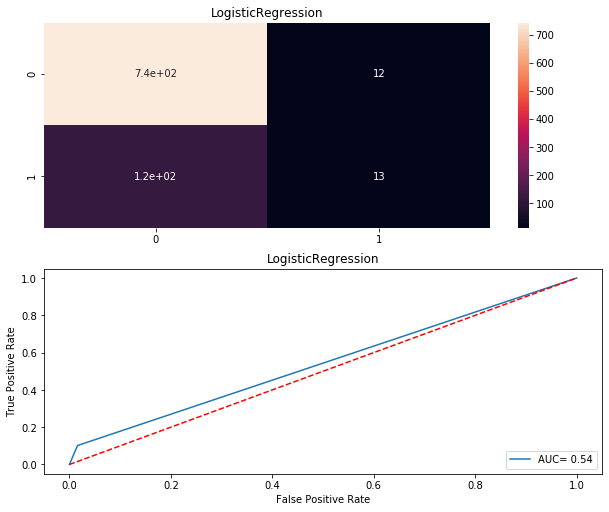

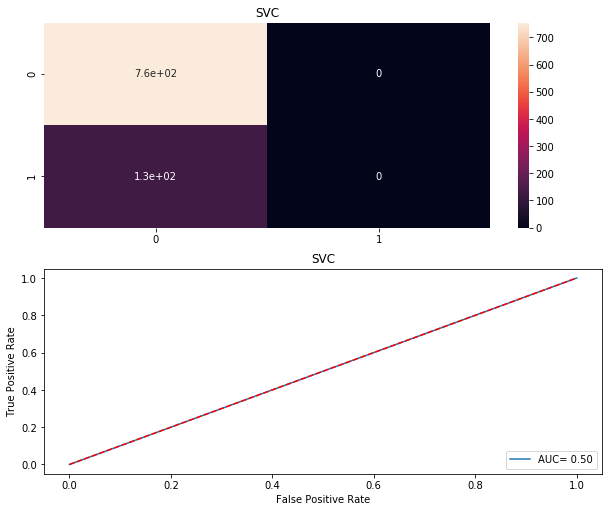

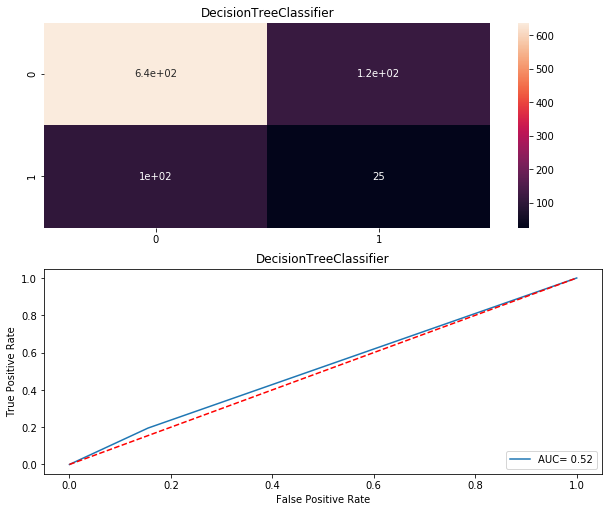

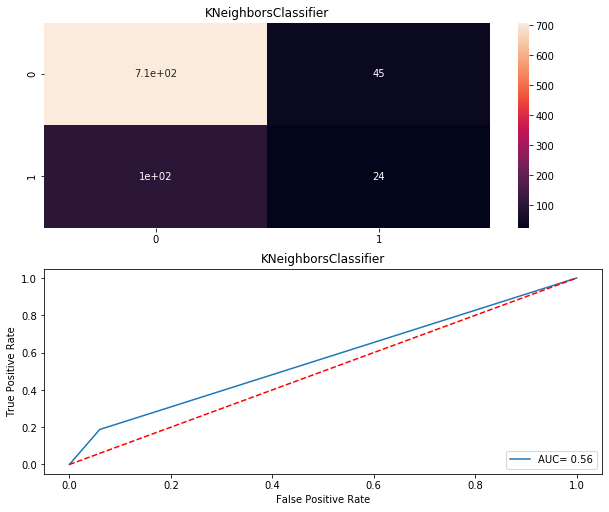

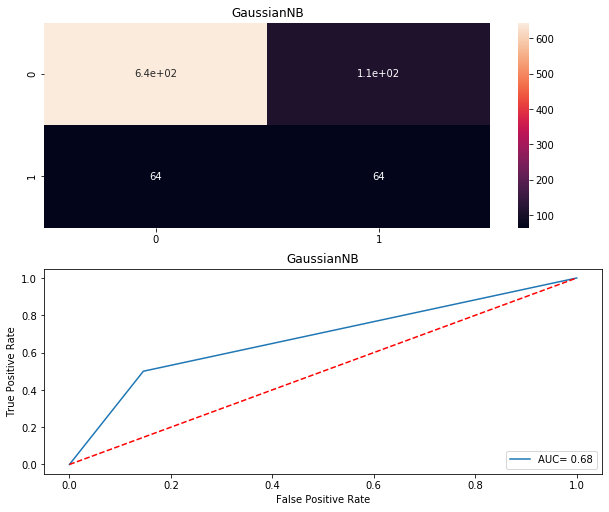

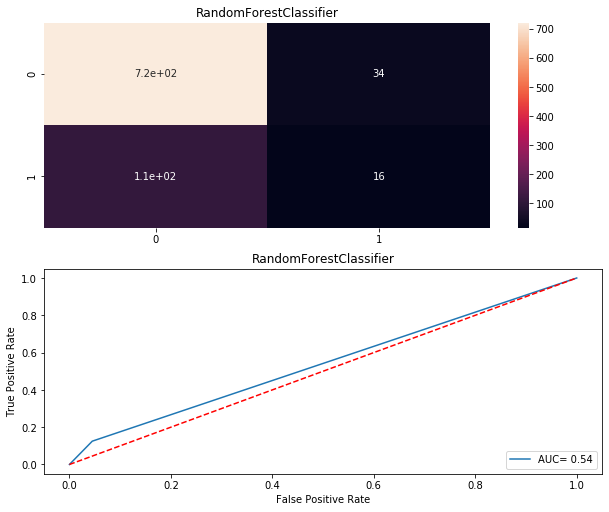

In [48]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,pre) #
    roc_auc= auc(false_positive_rate,true_positive_rate) #
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')   

In [49]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.svm.SVC(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8414496  0.85843715 0.85164213 0.85730464 0.85827664]
0.853422033214947
0.006485374201823758


In [50]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.0001, 'n_estimators': 50}

In [51]:
#Using cross val score to check the mean score and standard deviation
gbc=GradientBoostingClassifier(learning_rate=0.0001,n_estimators=50)
print("Mean score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=5).mean())
print('Standard Deviation in score for Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).std())

Mean score for Gradient Boosting Classifier: 0.8579520445399753
Standard Deviation in score for Gradient Boosting Classifier: 0.0005318399509730787


In [52]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[GradientBoostingClassifier(learning_rate=0.0001,n_estimators=50)]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.869762174405436
confusion matrix corresponding to random state: 42 is: [[768   0]
 [115   0]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0   

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 50 is: 0.8505096262740657
confusion matrix corresponding to random state: 50 is: [[751   0]
 [132   0]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0  

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 58 is: 0.8731596828992072
confusion matrix corresponding to random state: 58 is: [[771   0]
 [112   0]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0  

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 66 is: 0.8505096262740657
confusion matrix corresponding to random state: 66 is: [[751   0]
 [132   0]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0  

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 73 is: 0.8437146092865232
confusion matrix corresponding to random state: 73 is: [[745   0]
 [138   0]]
classification report corresponding to random state: 73 is:               precision    recall  f1-score   support

           0  

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 81 is: 0.840317100792752
confusion matrix corresponding to random state: 81 is: [[742   0]
 [141   0]]
classification report corresponding to random state: 81 is:               precision    recall  f1-score   support

           0   

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 89 is: 0.8595696489241224
confusion matrix corresponding to random state: 89 is: [[759   0]
 [124   0]]
classification report corresponding to random state: 89 is:               precision    recall  f1-score   support

           0  

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 97 is: 0.8652321630804077
confusion matrix corresponding to random state: 97 is: [[764   0]
 [119   0]]
classification report corresponding to random state: 97 is:               precision    recall  f1-score   support

           0  

In [53]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr)

Max accuracy Score corresponding to random state 56 is 0.8788221970554927


In [56]:
#We tried all methods and till now GradientBoostingClassifier is the best option 
#Random state corresponding to highest r2 score is 56
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.20)
gbc=GradientBoostingClassifier(learning_rate=0.0001,n_estimators=50)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print("Mean score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=5).mean())
print('Standard Deviation in score for Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).std())

Mean score for Gradient Boosting Classifier: 0.8579520445399753
Standard Deviation in score for Gradient Boosting Classifier: 0.0005318399509730787


In [57]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbc,"Project10_Agriculture.pkl")

['Project10_Agriculture.pkl']